In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

In [30]:
df_raw = pd.read_csv('bankdata.csv', index_col=0)

In [31]:
df_raw

,age,type of job,marital status,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [4]:
df_raw.describe()

,age,balance,day,duration,campaign,pdays,previous,Class
count,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000,45208.000000
mean,40.936294,1362.228676,15.806052,258.180211,2.763560,40.200562,0.580362,1.116993
std,10.618823,3044.794660,8.322417,257.527769,3.097582,100.131506,2.303513,0.321415
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


In [65]:
df_raw.shape

(45208, 17)

In [66]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45208 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45208 non-null  int64 
 1   type of job     45208 non-null  object
 2   marital status  45208 non-null  object
 3   education       45208 non-null  object
 4   default         45208 non-null  object
 5   balance         45208 non-null  int64 
 6   housing         45208 non-null  object
 7   loan            45208 non-null  object
 8   contact         45208 non-null  object
 9   day             45208 non-null  int64 
 10  month           45208 non-null  object
 11  duration        45208 non-null  int64 
 12  campaign        45208 non-null  int64 
 13  pdays           45208 non-null  int64 
 14  previous        45208 non-null  int64 
 15  outcome         45208 non-null  object
 16  Class           45208 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 6.2+ MB


In [67]:
df_raw.duplicated().any()

False

In [32]:
df_model = df_raw[['type of job','marital status','education','default','housing', 'loan', 'contact','month','outcome']]
df_dum = pd.get_dummies(df_model)

In [33]:
df_dum

,type of job_admin.,type of job_blue-collar,type of job_entrepreneur,type of job_housemaid,type of job_management,type of job_retired,type of job_self-employed,type of job_services,type of job_student,type of job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,outcome_failure,outcome_other,outcome_success,outcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [34]:
drop = df_raw.drop(['type of job','marital status','education','default','housing', 'loan', 'contact','month','outcome'], axis=1)
data = pd.concat([df_dum, drop], axis=1)

In [8]:
data

,type of job_admin.,type of job_blue-collar,type of job_entrepreneur,type of job_housemaid,type of job_management,type of job_retired,type of job_self-employed,type of job_services,type of job_student,type of job_technician,...,outcome_success,outcome_unknown,age,balance,day,duration,campaign,pdays,previous,Class
0,0,0,0,0,1,0,0,0,0,0,...,0,1,58,2143,5,261,1,-1,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,1,44,29,5,151,1,-1,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,33,2,5,76,1,-1,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,47,1506,5,92,1,-1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,33,1,5,198,1,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,0,1,51,825,17,977,3,-1,0,2
45207,0,0,0,0,0,1,0,0,0,0,...,0,1,71,1729,17,456,2,-1,0,2
45208,0,0,0,0,0,1,0,0,0,0,...,1,0,72,5715,17,1127,5,184,3,2
45209,0,1,0,0,0,0,0,0,0,0,...,0,1,57,668,17,508,4,-1,0,1


In [9]:
data.shape

(45208, 52)

In [35]:
#balanceo
total = data['Class'].value_counts()[1] + data['Class'].value_counts()[2]

success = (data['Class'].value_counts()[2]/total)
print('success rating:', success)

success rating: 0.11699256768713502


In [36]:
columns = data.columns
X = data.drop('Class',1)
y = data.Class

undersample = RandomUnderSampler()
X_under, y_under = undersample.fit_resample(X, y)

print(pd.Series(y_under).value_counts())

1    5289
2    5289
Name: Class, dtype: int64


/tmp/ipykernel_6129/1789726256.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('Class',1)


In [37]:
columns_X = np.delete(columns, 51)
columns_y = columns[-1]

In [38]:
X_df = pd.DataFrame(X_under, columns=columns_X)
y_df = pd.DataFrame(y_under, columns=[columns_y])

new_df = pd.concat([X_df, y_df], axis=1)
new_df

,type of job_admin.,type of job_blue-collar,type of job_entrepreneur,type of job_housemaid,type of job_management,type of job_retired,type of job_self-employed,type of job_services,type of job_student,type of job_technician,...,outcome_success,outcome_unknown,age,balance,day,duration,campaign,pdays,previous,Class
0,0,1,0,0,0,0,0,0,0,0,...,0,1,32,338,13,73,3,-1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,1,46,0,20,50,2,-1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,1,42,-355,5,939,6,-1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,56,0,11,118,2,-1,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,36,1088,13,77,2,345,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,0,0,0,0,0,1,0,0,0,0,...,0,0,73,2850,17,300,1,40,8,2
10574,0,0,0,0,0,0,0,0,0,1,...,0,1,25,505,17,386,2,-1,0,2
10575,0,0,0,0,0,0,0,0,0,1,...,0,1,51,825,17,977,3,-1,0,2
10576,0,0,0,0,0,1,0,0,0,0,...,0,1,71,1729,17,456,2,-1,0,2


In [39]:
col_names = new_df.columns
col_names

Index(['type of job_admin.', 'type of job_blue-collar',
       'type of job_entrepreneur', 'type of job_housemaid',
       'type of job_management', 'type of job_retired',
       'type of job_self-employed', 'type of job_services',
       'type of job_student', 'type of job_technician',
       'type of job_unemployed', 'type of job_unknown',
       'marital status_divorced', 'marital status_married',
       'marital status_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'outcome_failure', 'outcome_other', 'outcome_success',
       'outcome_unknown', 'age', 'balance', 'day', 'duration', 'campaign',
       '

In [40]:
s_scaler = StandardScaler()

df_s = s_scaler.fit_transform(new_df)
df_s = pd.DataFrame(df_s, columns=col_names)

In [42]:
df_s

,type of job_admin.,type of job_blue-collar,type of job_entrepreneur,type of job_housemaid,type of job_management,type of job_retired,type of job_self-employed,type of job_services,type of job_student,type of job_technician,...,outcome_success,outcome_unknown,age,balance,day,duration,campaign,pdays,previous,Class
0,-0.357377,2.166384,-0.171432,-0.160918,-0.544940,-0.278422,-0.184164,-0.299735,-0.187432,-0.445691,...,-0.330560,0.590378,-0.769150,-0.362599,-0.296850,-0.874513,0.216858,-0.486724,-0.378068,-1.0
1,-0.357377,-0.461599,-0.171432,-0.160918,1.835065,-0.278422,-0.184164,-0.299735,-0.187432,-0.445691,...,-0.330560,0.590378,0.404354,-0.461506,0.536346,-0.939998,-0.175534,-0.486724,-0.378068,-1.0
2,-0.357377,2.166384,-0.171432,-0.160918,-0.544940,-0.278422,-0.184164,-0.299735,-0.187432,-0.445691,...,-0.330560,0.590378,0.069067,-0.565388,-1.249074,1.591128,1.394033,-0.486724,-0.378068,-1.0
3,-0.357377,-0.461599,-0.171432,6.214336,-0.544940,-0.278422,-0.184164,-0.299735,-0.187432,-0.445691,...,-0.330560,0.590378,1.242571,-0.461506,-0.534906,-0.746391,-0.175534,-0.486724,-0.378068,-1.0
4,-0.357377,2.166384,-0.171432,-0.160918,-0.544940,-0.278422,-0.184164,-0.299735,-0.187432,-0.445691,...,-0.330560,-1.693829,-0.433863,-0.143130,-0.296850,-0.863125,-0.175534,2.677455,0.532498,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,-0.357377,-0.461599,-0.171432,-0.160918,-0.544940,3.591675,-0.184164,-0.299735,-0.187432,-0.445691,...,-0.330560,-1.693829,2.667540,0.372474,0.179262,-0.228208,-0.567925,-0.111778,3.264197,1.0
10574,-0.357377,-0.461599,-0.171432,-0.160918,-0.544940,-0.278422,-0.184164,-0.299735,-0.187432,2.243708,...,-0.330560,0.590378,-1.355902,-0.313731,0.179262,0.016648,-0.175534,-0.486724,-0.378068,1.0
10575,-0.357377,-0.461599,-0.171432,-0.160918,-0.544940,-0.278422,-0.184164,-0.299735,-0.187432,2.243708,...,-0.330560,0.590378,0.823462,-0.220091,0.179262,1.699320,0.216858,-0.486724,-0.378068,1.0
10576,-0.357377,-0.461599,-0.171432,-0.160918,-0.544940,3.591675,-0.184164,-0.299735,-0.187432,-0.445691,...,-0.330560,0.590378,2.499896,0.044442,0.179262,0.215949,-0.175534,-0.486724,-0.378068,1.0


In [41]:
new_df

,type of job_admin.,type of job_blue-collar,type of job_entrepreneur,type of job_housemaid,type of job_management,type of job_retired,type of job_self-employed,type of job_services,type of job_student,type of job_technician,...,outcome_success,outcome_unknown,age,balance,day,duration,campaign,pdays,previous,Class
0,0,1,0,0,0,0,0,0,0,0,...,0,1,32,338,13,73,3,-1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,1,46,0,20,50,2,-1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,1,42,-355,5,939,6,-1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,56,0,11,118,2,-1,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,36,1088,13,77,2,345,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,0,0,0,0,0,1,0,0,0,0,...,0,0,73,2850,17,300,1,40,8,2
10574,0,0,0,0,0,0,0,0,0,1,...,0,1,25,505,17,386,2,-1,0,2
10575,0,0,0,0,0,0,0,0,0,1,...,0,1,51,825,17,977,3,-1,0,2
10576,0,0,0,0,0,1,0,0,0,0,...,0,1,71,1729,17,456,2,-1,0,2


<AxesSubplot:title={'center':'Distribución después de submuestreo'}>

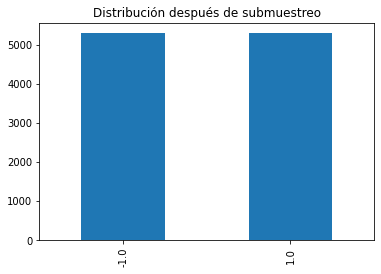

In [18]:
plt.rcParams['figure.figsize']=[10, 5]
new_df.Class.value_counts().plot(kind='bar', title='Distribución después de submuestreo')

In [19]:
total = new_df['Class'].value_counts()[1] + data['Class'].value_counts()[2]
succes = (new_df['Class'].value_counts()[1]/total) * 100
print('Porcentaje de operaciones exitosas:', succes)

Porcentaje de operaciones exitosas: 50.0


In [20]:
new_df.duplicated().any()

False

In [63]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

DT = tree.DecisionTreeClassifier()

DT.fit(X_train, y_train)

cross_val_score(DT, X_train, y_train, cv=5)

prediction1 = DT.predict(X_test)

In [64]:
print(DT.score(X_test, y_test))
print(np.mean(cross_val_score(DT, X_train, y_train, cv=5)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, DT.predict(X_test)))

0.7972589792060492
0.7972112955725075
[[  0   0   0]
 [867 162   0]
 [114 973   0]]
              precision    recall  f1-score   support

           1       0.78      0.81      0.80      1029
           2       0.81      0.79      0.80      1087

    accuracy                           0.80      2116
   macro avg       0.80      0.80      0.80      2116
weighted avg       0.80      0.80      0.80      2116



In [65]:
X = df_s.drop('Class', axis=1)
y = df_s['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LogisticRegression()

lr.fit(X_train, y_train)

prediction2 = lr.predict(X_test)

In [66]:
print(lr.score(X_test, y_test))
print(np.mean(cross_val_score(lr, X_train, y_train, cv=5)))
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, lr.predict(X_test)))

0.8303402646502835
0.8319562961938953
[[  0 867 162]
 [  0   0   0]
 [  0 114 973]]
              precision    recall  f1-score   support

        -1.0       0.82      0.84      0.83      1029
         1.0       0.85      0.82      0.83      1087

    accuracy                           0.83      2116
   macro avg       0.83      0.83      0.83      2116
weighted avg       0.83      0.83      0.83      2116



In [67]:
lab_enc = LabelEncoder()

X = new_df.drop('Class', axis=1)
y = lab_enc.fit_transform(new_df['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

XGB = XGBClassifier()

XGB.fit(X_train, y_train)

prediction3 = XGB.predict(X_test)

In [68]:
print(XGB.score(X_test, y_test))
print(np.mean(cross_val_score(XGB, X_train, y_train, cv=5)))
print(confusion_matrix(y_test, prediction3))
print(classification_report(y_test, XGB.predict(X_test)))

0.858781046696242
[[867 162]
 [114 973]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1029
           1       0.86      0.90      0.88      1087

    accuracy                           0.87      2116
   macro avg       0.87      0.87      0.87      2116
weighted avg       0.87      0.87      0.87      2116

